#### 7.1 확률적 데이터와 확률변수

In [21]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt

In [60]:
# 한글 나오도록 설정하기
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))

# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [65]:
# warnings 무시
import warnings
warnings.filterwarnings(action='ignore')

In [52]:
np.random.seed(0)
x=np.random.normal(size=21)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982])

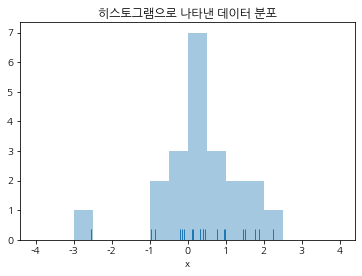

In [53]:
bins=np.linspace(-4,4,17)
sns.distplot(x,rug=True,kde=False,bins=bins)
plt.title("히스토그램으로 나타낸 데이터 분포")
plt.xlabel("x")
plt.show()

In [55]:
print("표본평균 ={}, 표본 중앙값 = {}".format(np.mean(x),np.median(x)))

표본평균 =0.4206524782418389, 표본 중앙값 = 0.4001572083672233


In [61]:
ns, _ =np.histogram(x,bins=bins)
m_bin=np.argmax(ns) # 최대값 위치 반환인듯
print("최빈구간 = {}~{}".format(bins[m_bin],bins[m_bin+1]))
# bins[m_bin],bins[m_bin+1] 최빈값이 있는 구간, 구간이라서 m_bin+1까지임

최빈구간 = 0.0~0.5


In [62]:
np.histogram(x,bins=bins)

(array([0, 0, 1, 0, 0, 0, 2, 3, 7, 3, 2, 2, 1, 0, 0, 0], dtype=int64),
 array([-4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,
         1.5,  2. ,  2.5,  3. ,  3.5,  4. ]))

In [63]:
np.argmax(ns)

8

### 연습문제 7.1.1

In [2]:
from sklearn.datasets import load_iris

In [26]:
iris=load_iris()

In [33]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
sy=pd.Series(iris.target,dtype="category")
sy=sy.cat.rename_categories(iris.target_names)
df['species']=sy

In [34]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [35]:
df.iloc[:,2] #꽃잎의 길이

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal length (cm), Length: 150, dtype: float64

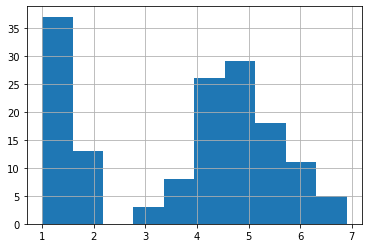

In [43]:
# 1) 꽃잎의 길이의 분포는 단봉분포인가 다봉분포인가?
#  꽃잎 길이의 분포는 다봉분포이다.
df["petal length (cm)"].hist()

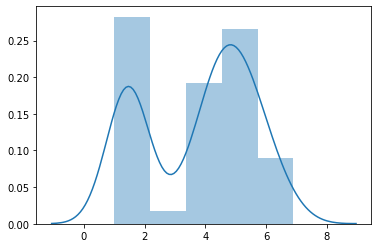

In [45]:
x=df["petal length (cm)"].values
sns.distplot(x)

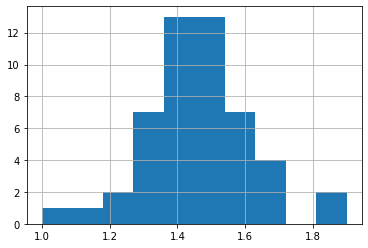

In [38]:
# setosa종 꽃잎 길이는 단봉분포
df[df.species=="setosa"]["petal length (cm)"].hist()

In [41]:
x=df[df.species=="setosa"]["petal length (cm)"].values

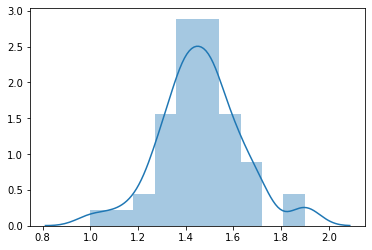

In [42]:
sns.distplot(x)

#### 연습문제 7.3.3

In [50]:
list_x_mean=[]
for i in range(1,51):
    X=np.random.normal(size=100)
    x_mean=X.mean()
    list_x_mean.append(x_mean)

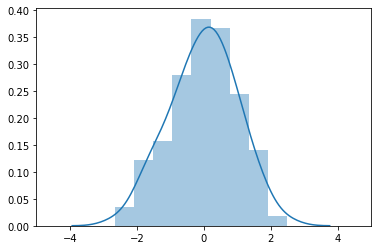

In [53]:
sns.distplot(X)
plt.xlim(-5,5)
plt.show()

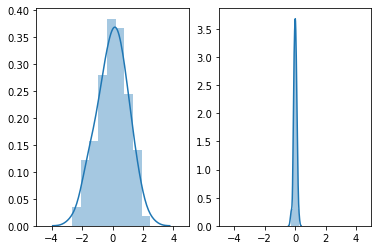

In [55]:
plt.subplot(121)
sns.distplot(X)
plt.xlim(-5,5)
plt.subplot(122)
sns.distplot(list_x_mean)
plt.xlim(-5,5)
plt.show()

### 7.4 다변수 확률변수

```
50명의 학생이 X,Y 두과목에 대해 시험을 보고 
그 결과가 A,B,C,D,E,F 학점으로 나왔다고 가정
각 열은X 행은Y 과목의 학점
행렬의 숫자는 해당 학점 조함을 받은 학생의수
```

In [56]:
grades=["A","B","C","D","E","F"]
scores=pd.DataFrame(
    [[1,2,1,0,0,0],
     [0,2,3,1,0,0],
     [0,4,7,4,1,0],
     [0,1,4,5,4,0],
     [0,0,1,3,2,0],
     [0,0,0,1,2,1]],
    columns=grades, index=grades)
scores.index.name="Y"
scores.columns.name="X"
scores

X,A,B,C,D,E,F
Y,,,,,,
A,1,2,1,0,0,0
B,0,2,3,1,0,0
C,0,4,7,4,1,0
D,0,1,4,5,4,0
E,0,0,1,3,2,0
F,0,0,0,1,2,1


In [58]:
# 결학확률질량함수
pmf=scores/scores.values.sum()
pmf

X,A,B,C,D,E,F
Y,,,,,,
A,0.02,0.04,0.02,0.00,0.00,0.00
B,0.00,0.04,0.06,0.02,0.00,0.00
C,0.00,0.08,0.14,0.08,0.02,0.00
D,0.00,0.02,0.08,0.10,0.08,0.00
E,0.00,0.00,0.02,0.06,0.04,0.00
F,0.00,0.00,0.00,0.02,0.04,0.02


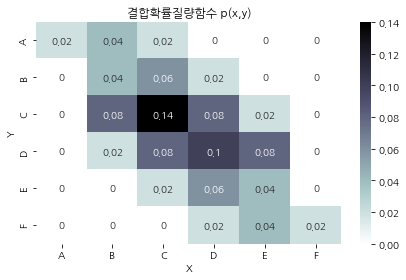

In [66]:
sns.heatmap(pmf, cmap=mpl.cm.bone_r,annot=True,
           xticklabels=['A','B','C','D','E','F'],
           yticklabels=['A','B','C','D','E','F'])
plt.title("결합확률질량함수 p(x,y)")
plt.tight_layout()
plt.show()

In [67]:
# 위 확률변수의 표본값이 (D,F)일 확률 --> 0.02
# X와 Y과목 뭐를 받았는지 모를때 뭐를 찍어야 맞출 가능성이 가장 높은가 --> (C,C)

### 조건부확률질량함수

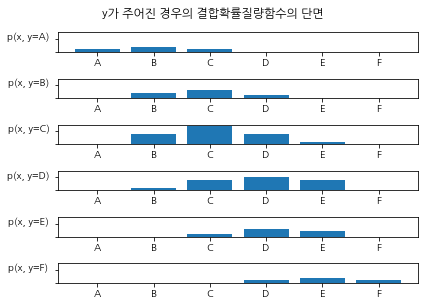

In [69]:
import string
x=np.arange(6)
for i,y in enumerate(string.ascii_uppercase[:6]):
    ax = plt.subplot(6,1,i+1)
    ax.tick_params(labelleft=False)
    plt.bar(x,pmf.iloc[i,:])
    plt.ylabel("p(x, y={})".format(y), rotation=0, labelpad=30)
    plt.ylim(0, 0.15)
    plt.xticks(range(6),['A', 'B', 'C', 'D', 'E', 'F'])
    
plt.suptitle("y가 주어진 경우의 결합확률질량함수의 단면", y=1.05)
plt.tight_layout()
plt.show()